In [54]:
import pandas as pd
from Bio import SeqIO

In [55]:
dfintact = pd.read_csv("../data/networks/fly/fly_intact.tsv", sep = "\t")
dfB = dfintact.head().T
dfB.insert(0, "iden", range(len(dfB)))
dfB

,iden,0,1,2,3,4
#ID(s) interactor A,0,uniprotkb:P16371,uniprotkb:O46036,uniprotkb:P13098,uniprotkb:P08181,uniprotkb:P13096
ID(s) interactor B,1,uniprotkb:P14003,uniprotkb:P14003,uniprotkb:P08181,uniprotkb:P13097,uniprotkb:P08181
Alt. ID(s) interactor A,2,intact:EBI-153866|intact:EBI-1639108|uniprotkb...,intact:EBI-159330|uniprotkb:O61283|uniprotkb:Q...,intact:EBI-185388|intact:EBI-1639218|uniprotkb...,intact:EBI-93115|uniprotkb:Q0E8B4|uniprotkb:Q9...,intact:EBI-104760|uniprotkb:Q9VBI8|intact:EBI-...
Alt. ID(s) interactor B,3,intact:EBI-123011|intact:EBI-1639662|uniprotkb...,intact:EBI-123011|intact:EBI-1639662|uniprotkb...,intact:EBI-93115|uniprotkb:Q0E8B4|uniprotkb:Q9...,intact:EBI-178179|intact:EBI-1639161|uniprotkb...,intact:EBI-93115|uniprotkb:Q0E8B4|uniprotkb:Q9...
Alias(es) interactor A,4,psi-mi:grou_drome(display_long)|uniprotkb:gro(...,psi-mi:ctbp_drome(display_long)|uniprotkb:CtBP...,"psi-mi:esm8_drome(display_long)|uniprotkb:""E(s...",psi-mi:csk2a_drome(display_long)|uniprotkb:CkI...,"psi-mi:esm5_drome(display_long)|uniprotkb:""E(s..."
Alias(es) interactor B,5,psi-mi:hair_drome(display_long)|uniprotkb:CG64...,psi-mi:hair_drome(display_long)|uniprotkb:CG64...,psi-mi:csk2a_drome(display_long)|uniprotkb:CkI...,"psi-mi:esm7_drome(display_long)|uniprotkb:""E(s...",psi-mi:csk2a_drome(display_long)|uniprotkb:CkI...
Interaction detection method(s),6,"psi-mi:""MI:0096""(pull down)","psi-mi:""MI:0096""(pull down)","psi-mi:""MI:0096""(pull down)","psi-mi:""MI:0018""(two hybrid)","psi-mi:""MI:0018""(two hybrid)"
Publication 1st author(s),7,Zhang et al. (1999),Zhang et al. (1999),Trott et al. (2001),Trott et al. (2001),Trott et al. (2001)
Publication Identifier(s),8,mint:MINT-6548485|pubmed:9892668,mint:MINT-6548485|pubmed:9892668,pubmed:11208814|mint:MINT-5213561,pubmed:11208814|mint:MINT-5213561,pubmed:11208814|mint:MINT-5213561
Taxid interactor A,9,"taxid:7227(drome)|taxid:7227(""Drosophila melan...","taxid:7227(drome)|taxid:7227(""Drosophila melan...","taxid:7227(drome)|taxid:7227(""Drosophila melan...","taxid:7227(drome)|taxid:7227(""Drosophila melan...","taxid:7227(drome)|taxid:7227(""Drosophila melan..."


<AxesSubplot:>

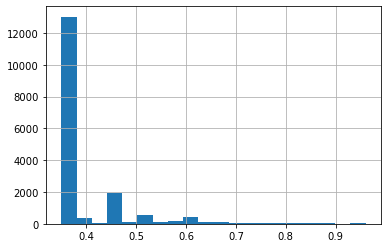

In [152]:
dfintact.loc[dfintact.iloc[:, 6].isin(coipmethods), :].iloc[:, 14].apply(lambda s: 0 if s == "-" else float(s.split(":")[-1])).hist(bins = 20)

<AxesSubplot:>

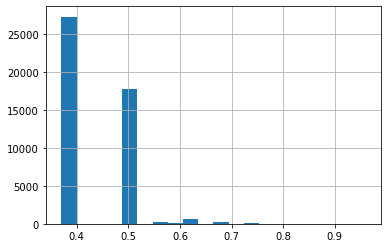

In [153]:
dfintact.loc[dfintact.iloc[:, 6].isin(y2hmethods), :].iloc[:, 14].apply(lambda s: 0 if s == "-" else float(s.split(":")[-1])).hist(bins = 20)

## COIP CONF          = 0
## Y2H CONF Threshold = 0.45

In [154]:
coipconf = 0
y2hconf  = 0.45

In [56]:
methods = list(set(methods[:, 0]))
list(enumerate(methods))

[(0, 'psi-mi:"MI:0053"(fluorescence polarization spectroscopy)'),
 (1, 'psi-mi:"MI:0107"(surface plasmon resonance)'),
 (2, 'psi-mi:"MI:0663"(confocal microscopy)'),
 (3, 'psi-mi:"MI:0017"(classical fluorescence spectroscopy)'),
 (4, 'psi-mi:"MI:0415"(enzymatic study)'),
 (5, 'psi-mi:"MI:0069"(mass spectrometry studies of complexes)'),
 (6, 'psi-mi:"MI:0067"(light scattering)'),
 (7, 'psi-mi:"MI:0588"(three hybrid)'),
 (8, 'psi-mi:"MI:0276"(blue native page)'),
 (9, 'psi-mi:"MI:0411"(enzyme linked immunosorbent assay)'),
 (10, 'psi-mi:"MI:0049"(filter binding)'),
 (11, 'psi-mi:"MI:0428"(imaging technique)'),
 (12, 'psi-mi:"MI:0084"(phage display)'),
 (13, 'psi-mi:"MI:0399"(two hybrid fragment pooling approach)'),
 (14, 'psi-mi:"MI:0010"(beta galactosidase complementation)'),
 (15, 'psi-mi:"MI:0434"(phosphatase assay)'),
 (16, 'psi-mi:"MI:0104"(static light scattering)'),
 (17, 'psi-mi:"MI:0006"(anti bait coimmunoprecipitation)'),
 (18, 'psi-mi:"MI:0096"(pull down)'),
 (19, 'psi-mi:"MI:

In [114]:
method_count = dfintact.iloc[:, [6]].value_counts().sort_values()
method_count.tail(20)

Interaction detection method(s)                           
psi-mi:"MI:0424"(protein kinase assay)                           46
psi-mi:"MI:0055"(fluorescent resonance energy transfer)          53
psi-mi:"MI:0809"(bimolecular fluorescence complementation)       56
psi-mi:"MI:0114"(x-ray crystallography)                          58
psi-mi:"MI:0416"(fluorescence microscopy)                        80
psi-mi:"MI:0676"(tandem affinity purification)                   86
psi-mi:"MI:0019"(coimmunoprecipitation)                          87
psi-mi:"MI:0402"(chromatin immunoprecipitation assay)            93
psi-mi:"MI:0071"(molecular sieving)                             106
psi-mi:"MI:0892"(solid phase assay)                             193
psi-mi:"MI:0029"(cosedimentation through density gradient)      296
psi-mi:"MI:0006"(anti bait coimmunoprecipitation)               554
psi-mi:"MI:0963"(interactome parallel affinity capture)         777
psi-mi:"MI:0045"(experimental interaction detection)     

In [115]:
coipmethods = {methods[17], methods[25], methods[58], methods[64], methods[18], methods[44]} # pull down, #tandem affinity purification
y2hmethods  = {methods[13], methods[38], methods[45], methods[52]}

coipmethods, y2hmethods

({'psi-mi:"MI:0006"(anti bait coimmunoprecipitation)',
  'psi-mi:"MI:0007"(anti tag coimmunoprecipitation)',
  'psi-mi:"MI:0019"(coimmunoprecipitation)',
  'psi-mi:"MI:0096"(pull down)',
  'psi-mi:"MI:0402"(chromatin immunoprecipitation assay)',
  'psi-mi:"MI:0676"(tandem affinity purification)'},
 {'psi-mi:"MI:0018"(two hybrid)',
  'psi-mi:"MI:0397"(two hybrid array)',
  'psi-mi:"MI:0399"(two hybrid fragment pooling approach)',
  'psi-mi:"MI:1112"(two hybrid prey pooling approach)'})

In [156]:
dfy2h = dfintact[dfintact.iloc[:, 6].isin(y2hmethods)]
f_confscore = lambda s: 0 if s == "-" else float(s.split(":")[-1])
dfy2h = dfy2h.loc[ dfy2h.iloc[:,14].apply(f_confscore) > y2hconf, :].reset_index(drop=True)
dfy2h

,#ID(s) interactor A,ID(s) interactor B,Alt. ID(s) interactor A,Alt. ID(s) interactor B,Alias(es) interactor A,Alias(es) interactor B,Interaction detection method(s),Publication 1st author(s),Publication Identifier(s),Taxid interactor A,...,Checksum(s) interactor A,Checksum(s) interactor B,Interaction Checksum(s),Negative,Feature(s) interactor A,Feature(s) interactor B,Stoichiometry(s) interactor A,Stoichiometry(s) interactor B,Identification method participant A,Identification method participant B
0,uniprotkb:P08181,uniprotkb:P13097,intact:EBI-93115|uniprotkb:Q0E8B4|uniprotkb:Q9...,intact:EBI-178179|intact:EBI-1639161|uniprotkb...,psi-mi:csk2a_drome(display_long)|uniprotkb:CkI...,"psi-mi:esm7_drome(display_long)|uniprotkb:""E(s...","psi-mi:""MI:0018""(two hybrid)",Trott et al. (2001),pubmed:11208814|mint:MINT-5213561,"taxid:7227(drome)|taxid:7227(""Drosophila melan...",...,rogid:0wrL1LjHFiPEQg3UxDl917ya/qg7227,rogid:ko+76awzLWRJNBn06B3PQZWBhf47227,intact-crc:39703168685D7B5F|rigid:TlF6WY6a0g+g...,False,tag:?-?(MINT-468436),tag:?-?(MINT-468442),-,-,"psi-mi:""MI:0078""(nucleotide sequence identific...","psi-mi:""MI:0078""(nucleotide sequence identific..."
1,uniprotkb:P13098,uniprotkb:P08181,intact:EBI-185388|intact:EBI-1639218|uniprotkb...,intact:EBI-93115|uniprotkb:Q0E8B4|uniprotkb:Q9...,"psi-mi:esm8_drome(display_long)|uniprotkb:""E(s...",psi-mi:csk2a_drome(display_long)|uniprotkb:CkI...,"psi-mi:""MI:0018""(two hybrid)",Trott et al. (2001),pubmed:11208814|mint:MINT-5213561,"taxid:7227(drome)|taxid:7227(""Drosophila melan...",...,rogid:Ytd8Ad4FJAfx25V7mHNi9e+F0pw7227,rogid:0wrL1LjHFiPEQg3UxDl917ya/qg7227,intact-crc:E5AD7D196D835D58|rigid:jm4iqqbCe8IB...,False,tag:?-?(MINT-468457),tag:?-?(MINT-468451),-,-,"psi-mi:""MI:0078""(nucleotide sequence identific...","psi-mi:""MI:0078""(nucleotide sequence identific..."
2,uniprotkb:Q24159,uniprotkb:P23573,intact:EBI-455799|intact:EBI-1629390,intact:EBI-95916|intact:EBI-1627637|uniprotkb:...,psi-mi:q24159_drome(display_long)|uniprotkb:Cy...,psi-mi:cdk2_drome(display_long)|uniprotkb:Cdk2...,"psi-mi:""MI:0018""(two hybrid)",Finley et al. (1994),mint:MINT-5220608|pubmed:7809159|doi:10.1073/p...,"taxid:7227(drome)|taxid:7227(""Drosophila melan...",...,rogid:v0+u1HylNkW8beHZZmGfAIjkczo7227,rogid:PFQ6DWcVE9kINQT+XsO0c7ROMLc7227,intact-crc:24BD23B4482F282B|rigid:CLKkZwct3U4X...,False,tag:?-?(MINT-1509645),tag:?-?(MINT-1509651),-,-,"psi-mi:""MI:0078""(nucleotide sequence identific...","psi-mi:""MI:0078""(nucleotide sequence identific..."
3,uniprotkb:P23572,uniprotkb:P54733,intact:EBI-108689|intact:EBI-1627558|uniprotkb...,intact:EBI-203549|intact:EBI-1628120|uniprotkb...,psi-mi:cdk1_drome(display_long)|uniprotkb:Cdk1...,psi-mi:ccne_drome(display_long)|uniprotkb:CycE...,"psi-mi:""MI:0018""(two hybrid)",Finley et al. (1994),mint:MINT-5220608|pubmed:7809159|doi:10.1073/p...,"taxid:7227(drome)|taxid:7227(""Drosophila melan...",...,rogid:WK4kxTRU/nlh6/LCeihCplHOZ2o7227,rogid:AwK/vwBDPgICbmeNxOxrcsj5kiQ7227,intact-crc:137AAF47A1AE1762|rigid:pvYn9pnjx9q/...,False,tag:?-?(MINT-1509604),tag:?-?(MINT-1509598),-,-,"psi-mi:""MI:0078""(nucleotide sequence identific...","psi-mi:""MI:0078""(nucleotide sequence identific..."
4,uniprotkb:P23573,uniprotkb:P91654,intact:EBI-95916|intact:EBI-1627637|uniprotkb:...,intact:EBI-868936|intact:EBI-1627645,psi-mi:cdk2_drome(display_long)|uniprotkb:Cdk2...,psi-mi:p91654_drome(display_long)|uniprotkb:da...,"psi-mi:""MI:0018""(two hybrid)",Finley et al. (1994),mint:MINT-5220608|pubmed:7809159|doi:10.1073/p...,"taxid:7227(drome)|taxid:7227(""Drosophila melan...",...,rogid:PFQ6DWcVE9kINQT+XsO0c7ROMLc7227,rogid:ntkvuc9a0N4KShJCJrbHYgpwBS47227,intact-crc:F4FEA94C09D2AEFA|rigid:psuadseCHR47...,False,tag:?-?(MINT-1509679),tag:?-?(MINT-1509673),-,-,"psi-mi:""MI:0078""(nucleotide sequence identific...","psi-mi:""MI:0078""(nucleotide sequence identific..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19111,uniprotkb:B7FNM4,uniprotkb:Q8IMF1,i

In [158]:
dfcoip = dfintact[dfintact.iloc[:, 6].isin(coipmethods)]
dfcoip = dfcoip.loc[ dfcoip.iloc[:,14].apply(f_confscore) > coipconf, :].reset_index(drop=True)
dfcoip

,#ID(s) interactor A,ID(s) interactor B,Alt. ID(s) interactor A,Alt. ID(s) interactor B,Alias(es) interactor A,Alias(es) interactor B,Interaction detection method(s),Publication 1st author(s),Publication Identifier(s),Taxid interactor A,...,Checksum(s) interactor A,Checksum(s) interactor B,Interaction Checksum(s),Negative,Feature(s) interactor A,Feature(s) interactor B,Stoichiometry(s) interactor A,Stoichiometry(s) interactor B,Identification method participant A,Identification method participant B
0,uniprotkb:P16371,uniprotkb:P14003,intact:EBI-153866|intact:EBI-1639108|uniprotkb...,intact:EBI-123011|intact:EBI-1639662|uniprotkb...,psi-mi:grou_drome(display_long)|uniprotkb:gro(...,psi-mi:hair_drome(display_long)|uniprotkb:CG64...,"psi-mi:""MI:0096""(pull down)",Zhang et al. (1999),mint:MINT-6548485|pubmed:9892668,"taxid:7227(drome)|taxid:7227(""Drosophila melan...",...,rogid:oSo29NrCWIeCi2OMusohCk64uiw7227,rogid:bO023bTsk72HhqvmgSjLEIotrDw7227,intact-crc:43555B21FFEEAE7A|rigid:FHdrglr3JteK...,False,glutathione s tranferase tag:?-?,binding-associated region:334-337(MINT-1542898...,-,-,"psi-mi:""MI:0821""(molecular weight estimation b...","psi-mi:""MI:0821""(molecular weight estimation b..."
1,uniprotkb:O46036,uniprotkb:P14003,intact:EBI-159330|uniprotkb:O61283|uniprotkb:Q...,intact:EBI-123011|intact:EBI-1639662|uniprotkb...,psi-mi:ctbp_drome(display_long)|uniprotkb:CtBP...,psi-mi:hair_drome(display_long)|uniprotkb:CG64...,"psi-mi:""MI:0096""(pull down)",Zhang et al. (1999),mint:MINT-6548485|pubmed:9892668,"taxid:7227(drome)|taxid:7227(""Drosophila melan...",...,rogid:hbMeldNlirFwVr+5QX9bGiPqZ1w7227,rogid:bO023bTsk72HhqvmgSjLEIotrDw7227,intact-crc:E548EEFF3BEC0246|rigid:6SxefJVI+l+g...,False,glutathione s tranferase tag:?-?,35s radiolabel:?-?|binding-associated region:3...,-,-,"psi-mi:""MI:0821""(molecular weight estimation b...","psi-mi:""MI:0821""(molecular weight estimation b..."
2,uniprotkb:P13098,uniprotkb:P08181,intact:EBI-185388|intact:EBI-1639218|uniprotkb...,intact:EBI-93115|uniprotkb:Q0E8B4|uniprotkb:Q9...,"psi-mi:esm8_drome(display_long)|uniprotkb:""E(s...",psi-mi:csk2a_drome(display_long)|uniprotkb:CkI...,"psi-mi:""MI:0096""(pull down)",Trott et al. (2001),pubmed:11208814|mint:MINT-5213561,"taxid:7227(drome)|taxid:7227(""Drosophila melan...",...,rogid:Ytd8Ad4FJAfx25V7mHNi9e+F0pw7227,rogid:0wrL1LjHFiPEQg3UxDl917ya/qg7227,intact-crc:828483A1856961E2|rigid:jm4iqqbCe8IB...,False,-,-,-,-,"psi-mi:""MI:0396""(predetermined participant)","psi-mi:""MI:0396""(predetermined participant)"
3,uniprotkb:Q7K105,uniprotkb:P08953,intact:EBI-129988|ensemblmetazoa:FBpp0087679|e...,intact:EBI-143610|uniprotkb:A4V3G7|uniprotkb:A...,psi-mi:q7k105_drome(display_long)|uniprotkb:My...,psi-mi:toll_drome(display_long)|uniprotkb:Tl(g...,"psi-mi:""MI:0019""(coimmunoprecipitation)",Horng et al. (2001),pubmed:11606776|mint:MINT-5214706,"taxid:7227(drome)|taxid:7227(""Drosophila melan...",...,rogid:ylgI2zl+aLG3S8D2ER2DrTRUpI47227,rogid:6nIbDMNS71rQ+CzvUkspyPjTd707227,intact-crc:54B41399B32F5A39|rigid:AKh/WPe9ypB1...,False,v5 tag:?-?|binding-associated region:176-537(I...,-,-,-,"psi-mi:""MI:0113""(western blot)","psi-mi:""MI:0113""(western blot)"
4,uniprotkb:P08953,uniprotkb:Q7K105,intact:EBI-143610|uniprotkb:A4V3G7|uniprotkb:A...,intact:EBI-129988|ensemblmetazoa:FBpp0087679|e...,psi-mi:toll_drome(display_long)|uniprotkb:Tl(g...,psi-mi:q7k105_drome(display_long)|uniprotkb:My...,"psi-mi:""MI:0019""(coimmunoprecipitation)",Horng et al. (2001),pubmed:11606776|mint:MINT-5214706,"taxid:7227(drome)|taxid:7227(""Drosophila melan...",...,rogid:6nIbDMNS71rQ+CzvUkspyPjTd707227,rogid:ylgI2zl+aLG3S8D2ER2DrTRUpI47227,intact-crc:6E86439FE2A24F50|rigid:AKh/WPe9ypB1...,False,-,v5 tag:?-?|binding-associated region:1-237,-,-,"psi-mi:""MI:0113""(western blot)","psi-mi:""MI:0113""(western blot)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17299,uniprotkb:Q9VKD7,uniprotkb:Q9VKD7,intact:EBI-9943000|ensemblmetazoa:FBpp0079900|...

In [159]:
dfy2h.to_csv("../data/networks/fly/fly-y2h.tsv", sep = "\t", index = None)
dfcoip.to_csv("../data/networks/fly/fly-coip.tsv", sep = "\t", index = None)

## Get the UNIPROT fasta file

In [119]:
records = list(SeqIO.parse("../data/networks/fly/uniprot-compressed_true_download_true_format_fasta_query__28proteome-2022.09.25-17.08.15.20.fasta", "fasta"))

In [120]:
filtered_records = [rec for rec in records if len(rec) <= 800]

In [121]:
len(filtered_records)

16545

## Parse all the proteins in both coip and y2h

In [122]:
y2hnodes  = set(dfy2h.iloc[:, [0]].values[:, 0]).union(set(dfy2h.iloc[:, [1]].values[:, 0]))
coipnodes = set(dfcoip.iloc[:, [0]].values[:, 0]).union(set(dfcoip.iloc[:, [1]].values[:, 0]))

In [123]:
allnodes = y2hnodes.union(coipnodes)
allnodes = {a.split(":")[1] for a in allnodes}

In [124]:
filtnodes = [f.id for f in filtered_records]
filtnodes = [f.split("|")[1] for f in filtnodes]

In [125]:
frecords = []
for fname, record in zip(filtnodes, filtered_records):
    if fname in allnodes:
        record.id = fname
        frecords.append(record)

In [126]:
with open("../data/networks/fly/uprotfly.fasta", "w") as output_handle:
    SeqIO.write(frecords, output_handle, "fasta")
len(frecords)

7975

In [127]:
import json
finalnodes = {rec.id: i for i, rec in enumerate(frecords)}
with open("../data/networks/fly/all_nodes.json", "w") as an:
    json.dump(finalnodes, an)

## Clean up the CoIP and Y2H networks

In [160]:
dfc = pd.read_csv("../data/networks/fly/fly-coip.tsv", sep = "\t")
dfy = pd.read_csv("../data/networks/fly/fly-y2h.tsv", sep = "\t")

In [161]:
dfc.shape, dfy.shape

((17304, 42), (19116, 42))

In [162]:
dfc1 = dfc.iloc[:, [0, 1]]
dfy1 = dfy.iloc[:, [0, 1]]
dfc1.columns = [0, 1]
dfy1.columns = [0, 1]
dfc1

,0,1
0,uniprotkb:P16371,uniprotkb:P14003
1,uniprotkb:O46036,uniprotkb:P14003
2,uniprotkb:P13098,uniprotkb:P08181
3,uniprotkb:Q7K105,uniprotkb:P08953
4,uniprotkb:P08953,uniprotkb:Q7K105
...,...,...
17299,uniprotkb:Q9VKD7,uniprotkb:Q9VKD7
17300,uniprotkb:Q9VS51,uniprotkb:Q9VND8
17301,uniprotkb:Q9VS51,uniprotkb:Q9VND8
17302,uniprotkb:P28159,uniprotkb:P20226


In [163]:
dfcnodes = set(dfc1[0]).union(set(dfc1[1]))
dfynodes = set(dfy1[0]).union(set(dfy1[1]))

In [164]:
dfcmap = {k: k.split(":")[1] for k in dfcnodes}
dfymap = {k: k.split(":")[1] for k in dfynodes}

In [165]:
dfc2 = dfc1.replace({0:dfcmap, 1:dfcmap})
dfy2 = dfy1.replace({0:dfymap, 1:dfymap})

In [166]:
dfc2

,0,1
0,P16371,P14003
1,O46036,P14003
2,P13098,P08181
3,Q7K105,P08953
4,P08953,Q7K105
...,...,...
17299,Q9VKD7,Q9VKD7
17300,Q9VS51,Q9VND8
17301,Q9VS51,Q9VND8
17302,P28159,P20226


In [167]:
dfy2

,0,1
0,P08181,P13097
1,P13098,P08181
2,Q24159,P23573
3,P23572,P54733
4,P23573,P91654
...,...,...
19111,B7FNM4,Q8IMF1
19112,Q9W1Z1,Q9VV10
19113,Q9W1Z1,M9PEI0
19114,B7FNN9,Q8IMF1


In [168]:
allowednodes = set(finalnodes.keys())
len(allowednodes), list(allowednodes)[:100]

(7975,
 ['Q9VBT4',
  'P40794',
  'Q9VCE0',
  'Q7JW01',
  'Q9VLJ5',
  'Q9VMM6',
  'Q7K2J4',
  'Q9VGV9',
  'Q9XTP7',
  'Q9VC81',
  'Q9W2M2',
  'Q9VWY6',
  'Q9W528',
  'Q9VHG6',
  'Q9W021',
  'Q9VI14',
  'Q8MSY4',
  'A1ZAC4',
  'Q9VL14',
  'P38979',
  'O18399',
  'Q9VL44',
  'Q9VAF9',
  'Q9W4D8',
  'Q9VFN3',
  'Q8IH24',
  'C7LAF3',
  'Q9VHR7',
  'O16130',
  'Q7K4L8',
  'Q8IRU1',
  'Q8WTI6',
  'Q8IQG3',
  'Q9W5B3',
  'Q9VXR5',
  'Q0E9B6',
  'A0A0B4KEQ5',
  'Q9VG98',
  'Q95TS8',
  'Q7K284',
  'Q9VRZ3',
  'Q8IGP1',
  'E2QCZ5',
  'Q9VBR1',
  'Q9VTY0',
  'Q9VUB0',
  'Q9VJ90',
  'Q9V557',
  'Q9W3T2',
  'Q8T452',
  'Q9VU69',
  'Q7JY31',
  'F0JAI6',
  'Q94918',
  'Q8IN08',
  'Q1LZ24',
  'Q95U38',
  'Q9VG01',
  'Q9VGB2',
  'Q9VVP3',
  'Q7JZ51',
  'Q9VAL7',
  'Q7JRC3',
  'Q9VID7',
  'Q2MGL3',
  'Q9VX14',
  'O77460',
  'Q9VHI4',
  'Q9VGY8',
  'Q9VC65',
  'Q9VCY7',
  'Q9VPF3',
  'Q8T8W0',
  'Q9W1I8',
  'Q6IKG0',
  'Q9VIK5',
  'P06754',
  'Q8IR18',
  'Q9VFT4',
  'Q9VCU4',
  'Q9I7U1',
  'Q9VW78',
  'Q8

In [169]:
dfc3 = dfc2[(dfc2[0].isin(allowednodes)) & (dfc2[1].isin(allowednodes))]
dfc3

,0,1
0,P16371,P14003
1,O46036,P14003
2,P13098,P08181
5,Q7K105,Q9V3B4
6,Q7K105,Q8IRY7
...,...,...
17297,Q9W3F7,Q9VKD7
17298,Q9W3F7,Q9VKD7
17299,Q9VKD7,Q9VKD7
17300,Q9VS51,Q9VND8


In [195]:
dfy3 = dfy2[(dfy2[0].isin(allowednodes)) & (dfy2[1].isin(allowednodes))]
dfy3

,0,1
0,P08181,P13097
1,P13098,P08181
3,P23572,P54733
12,Q9VI13,P40792
13,Q9VI13,P48554
...,...,...
19108,Q9VEK1,Q9W1Z1
19109,Q9VH59,Q9W1Z1
19112,Q9W1Z1,Q9VV10
19113,Q9W1Z1,M9PEI0


In [196]:
dfy3.to_csv("../data/networks/fly/fly-y2h-filtered.tsv", sep = "\t", header = None, index = None)
dfc3.to_csv("../data/networks/fly/fly-coip-filtered.tsv", sep = "\t", header = None, index = None)

## Filter the fasta file again

In [174]:
from Bio import SeqIO
records = list(SeqIO.parse("../data/networks/fly/uprotfly.fasta", "fasta"))

In [175]:
allnodes = set(dfy3[0]).union(set(dfy3[1])).union(set(dfc3[0])).union(set(dfc3[1]))

In [176]:
len(allnodes)

4229

In [177]:
records = [r for r in records if (r.id in allnodes)]

In [178]:
len(records)

4229

In [179]:
with open("../data/networks/fly/uprotfly-final.fasta", "w") as output_handle:
    SeqIO.write(records, output_handle, "fasta")

## Compute the D-SCRIPT embedding

In [180]:
!gpustat

imp                      Sun Sep 25 17:42:46 2022  470.141.03
[0] Tesla V100-PCIE-32GB | 32'C,   0 % |     0 / 32510 MB |
[1] Tesla V100-PCIE-32GB | 30'C,   0 % |     0 / 32510 MB |
[2] Tesla V100-PCIE-32GB | 32'C,   0 % |     0 / 32510 MB |
[3] Tesla V100-PCIE-32GB | 32'C,   0 % |     0 / 32510 MB |
[4] Tesla V100-PCIE-32GB | 31'C,   0 % |     0 / 32510 MB |
[5] Tesla V100-PCIE-32GB | 32'C,   0 % |     0 / 32510 MB |
[6] Tesla V100-PCIE-32GB | 31'C,   0 % |     0 / 32510 MB |
[7] Tesla V100-PCIE-32GB | 31'C,   3 % |     0 / 32510 MB |


In [182]:
!dscript embed --help

usage: dscript embed [-h] --seqs SEQS -o OUTFILE [-d DEVICE]

Generate new embeddings using pre-trained language model.

optional arguments:
  -h, --help            show this help message and exit
  --seqs SEQS           Sequences to be embedded
  -o OUTFILE, --outfile OUTFILE
                        h5 file to write results
  -d DEVICE, --device DEVICE
                        Compute device to use


In [183]:
!dscript embed --seqs ../data/networks/fly/uprotfly-final.fasta -o ../data/networks/fly/uprotfly-final.h5 -d 0

[2022-09-25-17:43:57] # Using CUDA device 0 - Tesla V100-PCIE-32GB
[2022-09-25-17:43:57] # Loading Model...
[2022-09-25-17:43:57] Downloading model lm_v1 from http://cb.csail.mit.edu/cb/dscript/data/models/dscript_lm_v1.pt...
[2022-09-25-17:44:02] # Loading Sequences...
100%|████████████████████████████████████| 4229/4229 [00:00<00:00, 51142.53it/s]
[2022-09-25-17:44:02] # 4229 Sequences Loaded
[2022-09-25-17:44:02] # Approximate Storage Required (varies by average sequence length): ~33.832GB
[2022-09-25-17:44:02] # Storing to ../data/networks/fly/uprotfly-final.h5...
100%|███████████████████████████████████████| 4229/4229 [09:22<00:00,  7.52it/s]


## Generate the training and test cases for the networks

In [233]:
import numpy as np

def get_test_set(net, neg_to_pos_ratio = 10):
    if isinstance(net, str):
        df = pd.read_csv(netfile, sep = "\t", header = None)
    else:
        df = net
    
    df.loc[df[0] > df[1]] = df.loc[df[0] > df[1], [1, 0]]
    df[2] = 1
    
    edges = {}
    for p, q, w in df.values:
        edges[f"{p}:{q}"] = w
    
    
    nodes  = list(set(df[0]).union(set(df[1])))
    n_nodes= len(nodes)
    
    noneg  = neg_to_pos_ratio * len(df)
    
    negset = []
    while len(negset) < noneg:
        p, q = np.random.randint(n_nodes, size=2)
        if p == q:
            continue
        p_, q_ = [nodes[p], nodes[q]]
        if p_ > q_:
            temp = p_
            p_   = q_
            q_   = temp
        if f"{p}:{q}" in edges:
            continue
        negset.append((p_, q_, 0))
    dfneg = pd.DataFrame(negset, columns = [0, 1, 2])
    return pd.concat([df, dfneg])

In [227]:
tset = get_test_set("../data/networks/fly/fly-coip-filtered.tsv", neg_to_pos_ratio=10)
tset.to_csv("../data/networks/fly/fly_coip_evaluation.tsv", sep = "\t", header = None, index = None)

In [234]:
dfy  = pd.read_csv("../data/networks/fly/fly-y2h-filtered.tsv", sep = "\t", header = None)
dfy1 = dfy.sample(n=4371, random_state=  1)
yset  = get_test_set(dfy1)

In [236]:
yset.to_csv("../data/networks/fly/fly_y2hi_evaluation.tsv", sep = "\t", header = None, index = None)

## Visualize COIP

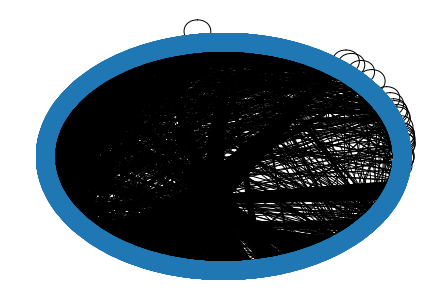

In [240]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv("../data/networks/fly/fly-coip-filtered.tsv", sep = "\t", header = None)

G = nx.from_pandas_edgelist(df, 0, 1)
sp = nx.circular_layout(G)
nx.draw(G, pos = sp)
plt.show()